In [1]:
import os
import re
import string
import numpy as np

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.metrics.pairwise import cosine_similarity

In [4]:
gloveFile = "/home/bhrt/Desktop/glove.42B.300d.txt"

In [5]:
dim=300

In [6]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

In [7]:
def rem_ascii(s):
    return "".join()

In [8]:
# Cleaning the text sentences so that punctuation marks, stop words and digits are removed.
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    processed = re.sub(r"\d+","",punc_free)
    return processed

In [9]:
def loadGloveModel(gloveFile):
    word_embeddings = {}
    f = open(gloveFile, encoding='utf-8')
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        word_embeddings[word] = coefs
    f.close()
    return word_embeddings

In [10]:
word_embeddings = loadGloveModel(gloveFile)

In [11]:
print("Vocab Size = ",len(word_embeddings))

Vocab Size =  1917494


In [12]:
text = """ Life is beautiful, but not always. It has lots of problems you have to face everyday. Don't worry though! All these problems make you strong, it gives you courage to stand alone in future. Life is full of moments of joy, pleasure, success and comfort punctuated by misery, defeat, failures and problems. There is no human being on Earth, strong, powerful, wise or rich, who has not experienced, struggle, suffering or failure. You have to work hard to reach to the highest position. Life is full of paths, you just have to choose the right one. Life is interesting and amazing like the stars up in the skies.

With no doubt, Life is beautiful and full of celebrations. However you should always be ready to face adversity and challenges. There are difficult situations in life as well.Be careful!! You might get hurt too hard. Life is sometimes too selfish to think about yourself. Then life is too hard to handle. Falling in love! People tend to fall in love nowadays but i personally think the right time has to come... You might also get hurt in Love. You might be broken-hearted as the people say.

Life is the place where people treat everyone differently, racism exists as well as bullying. People tend to say bad stuff behind people's back. There are millions of people using horrible words to call people, People use people everyday. Life is not that easy in my view. Sometimes, all you want to do is sit alone and question yourself with hundred of questions"""

In [13]:
print(text)

 Life is beautiful, but not always. It has lots of problems you have to face everyday. Don't worry though! All these problems make you strong, it gives you courage to stand alone in future. Life is full of moments of joy, pleasure, success and comfort punctuated by misery, defeat, failures and problems. There is no human being on Earth, strong, powerful, wise or rich, who has not experienced, struggle, suffering or failure. You have to work hard to reach to the highest position. Life is full of paths, you just have to choose the right one. Life is interesting and amazing like the stars up in the skies.

With no doubt, Life is beautiful and full of celebrations. However you should always be ready to face adversity and challenges. There are difficult situations in life as well.Be careful!! You might get hurt too hard. Life is sometimes too selfish to think about yourself. Then life is too hard to handle. Falling in love! People tend to fall in love nowadays but i personally think the rig

In [14]:
sentences = sent_tokenize(text)

In [15]:
#senteces embedding from the GLOVE
#idea ==> cal the avg emb fromt all the words present in the sentence

sentence_vectors = []
for i in sentences:
    if len(i)!=0:
        v = sum([word_embeddings.get(w, np.zeros((dim,))) for w in i.split()])/(len(i.split())+0.001)
    else:
        v = np.zeros((dim,))
    sentence_vectors.append(v)
        
        


In [16]:
#Now we have 300 dimensional vector for each sentence of the article.
#next step is to create similarity matrix that keeps cosine distance of each sentecne to every other sentence



In [17]:
sim_mat = np.zeros([len(sentences),len(sentences)])

In [18]:
for i in range(len(sentences)):
    for j in range(len(sentences)):
        if i!=j:
            sim_mat[i][j] = cosine_similarity(sentence_vectors[i].reshape(1,dim),sentence_vectors[j].reshape(1,dim))[0,0]
            

In [19]:
sim_mat = np.round(sim_mat,3)

In [20]:
print(sim_mat)

[[0.    0.848 0.615 0.861 0.811 0.888 0.819 0.878 0.858 0.851 0.859 0.837
  0.8   0.887 0.873 0.661 0.876 0.877 0.888 0.814 0.817 0.91  0.859]
 [0.848 0.    0.671 0.946 0.905 0.916 0.92  0.952 0.92  0.91  0.941 0.894
  0.833 0.89  0.897 0.732 0.949 0.897 0.918 0.889 0.932 0.916 0.95 ]
 [0.615 0.671 0.    0.684 0.595 0.634 0.58  0.632 0.58  0.577 0.673 0.63
  0.74  0.71  0.644 0.406 0.684 0.633 0.642 0.717 0.643 0.636 0.692]
 [0.861 0.946 0.684 0.    0.881 0.908 0.929 0.95  0.918 0.882 0.954 0.911
  0.852 0.919 0.915 0.755 0.96  0.9   0.927 0.908 0.921 0.925 0.966]
 [0.811 0.905 0.595 0.881 0.    0.882 0.855 0.902 0.908 0.935 0.874 0.875
  0.731 0.83  0.858 0.738 0.879 0.83  0.875 0.798 0.871 0.887 0.903]
 [0.888 0.916 0.634 0.908 0.882 0.    0.873 0.92  0.896 0.907 0.9   0.891
  0.803 0.891 0.888 0.719 0.923 0.892 0.928 0.843 0.902 0.915 0.922]
 [0.819 0.92  0.58  0.929 0.855 0.873 0.    0.934 0.9   0.857 0.92  0.866
  0.793 0.868 0.913 0.733 0.934 0.875 0.89  0.876 0.897 0.895 0.921]


In [21]:
#basically we'll be using the text rank algo
#more impo websites are likely to receive more links from other websites
#similary we'll  see how one sentence is similar to other sentence

In [23]:
#lets create a map showing this relation


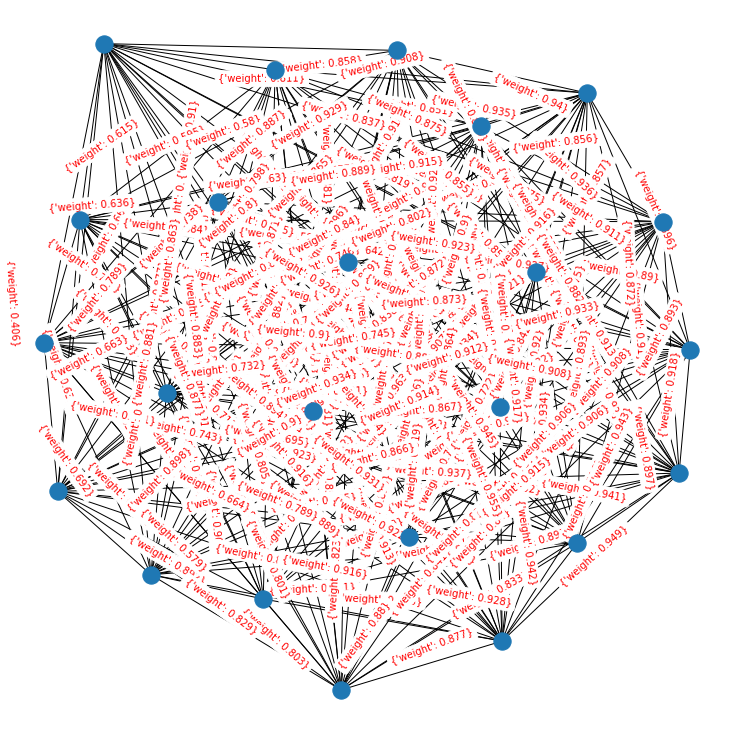

In [24]:
nx_graph = nx.from_numpy_array(sim_mat)
plt.figure(figsize=(10,10))
pos = nx.spring_layout(nx_graph)
nx.draw(nx_graph,with_lables = True,font_weight='bold')
nx.draw_networkx_edge_labels(nx_graph,pos,font_color='red')
plt.show()

In [25]:
#so now we will use the text rank algo which is simil to the page rank
scores = nx.pagerank(nx_graph)
print(scores)

{0: 0.042660894820414554, 1: 0.04511449130915177, 2: 0.03402963087957214, 3: 0.0454054374686266, 4: 0.04312675319950813, 5: 0.04435069600087487, 6: 0.043963735891095555, 7: 0.045420881651361794, 8: 0.04461354509851256, 9: 0.04354739927625833, 10: 0.04474170918020659, 11: 0.043870143725159266, 12: 0.04116134684673753, 13: 0.044269900151968064, 14: 0.044133982207281146, 15: 0.037154442397124815, 16: 0.0458128742387035, 17: 0.04383050183980612, 18: 0.04484383702665476, 19: 0.04346258791802581, 20: 0.044196799159657296, 21: 0.04481683876852893, 22: 0.045471570944769765}


In [26]:
#for 22 sentences

In [27]:
#thus we''ll not be using the least scored sentence

In [28]:
ranked_sentences = sorted(((scores[i],i)for i,s in enumerate(sentences)),reverse=True)

In [29]:
arranged_sentences = sorted(ranked_sentences[0:int(len(sentences)*0.5)] , key=lambda x:x[1])

In [32]:
print("\n".join([sentences[x[1]] for x in arranged_sentences]))

It has lots of problems you have to face everyday.
All these problems make you strong, it gives you courage to stand alone in future.
There is no human being on Earth, strong, powerful, wise or rich, who has not experienced, struggle, suffering or failure.
Life is full of paths, you just have to choose the right one.
Life is interesting and amazing like the stars up in the skies.
However you should always be ready to face adversity and challenges.
Life is sometimes too selfish to think about yourself.
People tend to fall in love nowadays but i personally think the right time has to come... You might also get hurt in Love.
Life is the place where people treat everyone differently, racism exists as well as bullying.
Life is not that easy in my view.
Sometimes, all you want to do is sit alone and question yourself with hundred of questions


In [12]:
print("Vocab Size = ",len(word_embeddings))

Vocab Size =  1917494


In [49]:
text = """Life is beautiful, but not always. It has lots of problems you have to face everyday. Don't worry though! All these problems make you strong, it gives you courage to stand alone in future. Life is full of moments of joy, pleasure, success and comfort punctuated by misery, defeat, failures and problems. There is no human being on Earth, strong, powerful, wise or rich, who has not experienced, struggle, suffering or failure. You have to work hard to reach to the highest position. Life is full of paths, you just have to choose the right one. Life is interesting and amazing like the stars up in the skies.

With no doubt, Life is beautiful and full of celebrations. However you should always be ready to face adversity and challenges. There are difficult situations in life as well.Be careful!! You might get hurt too hard. Life is sometimes too selfish to think about yourself. Then life is too hard to handle. Falling in love! People tend to fall in love nowadays but i personally think the right time has to come... You might also get hurt in Love. You might be broken-hearted as the people say."""

In [50]:
print(text)

Life is beautiful, but not always. It has lots of problems you have to face everyday. Don't worry though! All these problems make you strong, it gives you courage to stand alone in future. Life is full of moments of joy, pleasure, success and comfort punctuated by misery, defeat, failures and problems. There is no human being on Earth, strong, powerful, wise or rich, who has not experienced, struggle, suffering or failure. You have to work hard to reach to the highest position. Life is full of paths, you just have to choose the right one. Life is interesting and amazing like the stars up in the skies.

With no doubt, Life is beautiful and full of celebrations. However you should always be ready to face adversity and challenges. There are difficult situations in life as well.Be careful!! You might get hurt too hard. Life is sometimes too selfish to think about yourself. Then life is too hard to handle. Falling in love! People tend to fall in love nowadays but i personally think the righ

In [51]:
sentences = sent_tokenize(text)

In [62]:
# clean(sentences)

In [63]:
cleaned_texts = [rem_ascii(clean(sentence)) for sentence in sentences]

TypeError: join() takes exactly one argument (0 given)

In [64]:
sentence_vectors = []
for i in sentences:
    if len(i) != 0:
        v = sum([word_embeddings.get(w, np.zeros((dim,))) for w in i.split()])/(len(i.split())+0.001)
    else:
        v = np.zeros((dim,))
    sentence_vectors.append(v)

In [55]:
sim_mat = np.zeros([len(sentences), len(sentences)])
for i in range(len(sentences)):
    for j in range(len(sentences)):
        if i != j:
            sim_mat[i][j] = cosine_similarity(sentence_vectors[i].reshape(1,dim),sentence_vectors[j].reshape(1,dim))[0,0]
sim_mat = np.round(sim_mat,3)
print(sim_mat)

[[0.    0.848 0.615 0.861 0.811 0.888 0.819 0.878 0.858 0.851 0.859 0.837
  0.8   0.887 0.873 0.661 0.876 0.877]
 [0.848 0.    0.671 0.946 0.905 0.916 0.92  0.952 0.92  0.91  0.941 0.894
  0.833 0.89  0.897 0.732 0.949 0.897]
 [0.615 0.671 0.    0.684 0.595 0.634 0.58  0.632 0.58  0.577 0.673 0.63
  0.74  0.71  0.644 0.406 0.684 0.633]
 [0.861 0.946 0.684 0.    0.881 0.908 0.929 0.95  0.918 0.882 0.954 0.911
  0.852 0.919 0.915 0.755 0.96  0.9  ]
 [0.811 0.905 0.595 0.881 0.    0.882 0.855 0.902 0.908 0.935 0.874 0.875
  0.731 0.83  0.858 0.738 0.879 0.83 ]
 [0.888 0.916 0.634 0.908 0.882 0.    0.873 0.92  0.896 0.907 0.9   0.891
  0.803 0.891 0.888 0.719 0.923 0.892]
 [0.819 0.92  0.58  0.929 0.855 0.873 0.    0.934 0.9   0.857 0.92  0.866
  0.793 0.868 0.913 0.733 0.934 0.875]
 [0.878 0.952 0.632 0.95  0.902 0.92  0.934 0.    0.945 0.933 0.937 0.88
  0.823 0.913 0.911 0.743 0.962 0.913]
 [0.858 0.92  0.58  0.918 0.908 0.896 0.9   0.945 0.    0.94  0.896 0.895
  0.775 0.876 0.888 0.8 

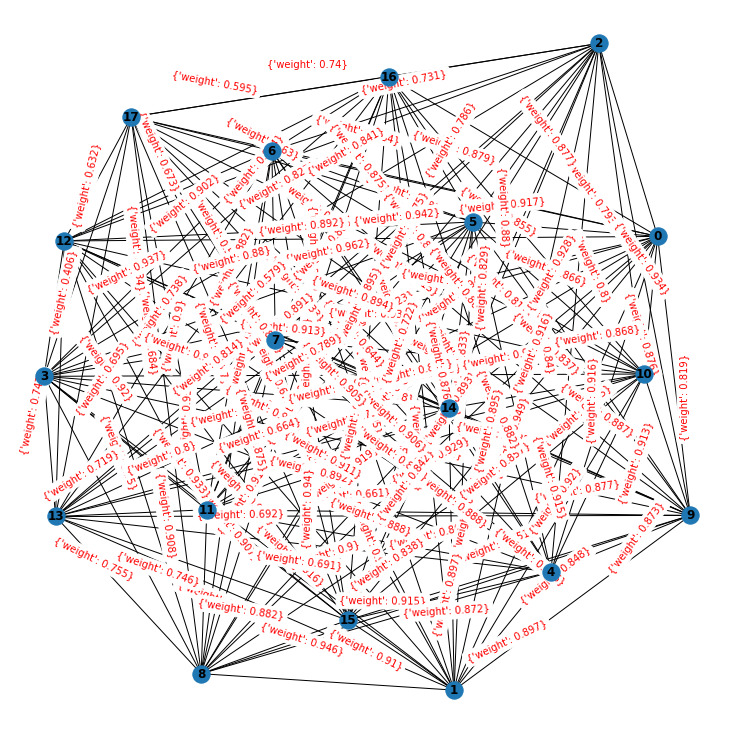

In [56]:
# Creating the network graph
nx_graph = nx.from_numpy_array(sim_mat)
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(nx_graph)
nx.draw(nx_graph, with_labels=True, font_weight='bold')
nx.draw_networkx_edge_labels(nx_graph,pos,font_color='red')
plt.show()

In [57]:
scores = nx.pagerank(nx_graph)
print(scores)

{0: 0.05495973778750145, 1: 0.05803834436547973, 2: 0.04360444387675408, 3: 0.058388771012973094, 4: 0.05559165155805188, 5: 0.05706807527471604, 6: 0.056519001612359655, 7: 0.05838863630098208, 8: 0.057361083032210075, 9: 0.05607781798210407, 10: 0.057646465421548984, 11: 0.056527161810197464, 12: 0.05299397264027657, 13: 0.05686122991847594, 14: 0.056881834474082946, 15: 0.04780585584348895, 16: 0.058928336654010066, 17: 0.05635758043478675}


In [58]:
ranked_sentences = sorted(((scores[i],i) for i,s in enumerate(sentences)), reverse=True)
arranged_sentences = sorted(ranked_sentences[0:int(len(sentences)*0.5)], key=lambda x:x[1])
print("\n".join([sentences[x[1]] for x in arranged_sentences]))

It has lots of problems you have to face everyday.
All these problems make you strong, it gives you courage to stand alone in future.
There is no human being on Earth, strong, powerful, wise or rich, who has not experienced, struggle, suffering or failure.
Life is full of paths, you just have to choose the right one.
Life is interesting and amazing like the stars up in the skies.
However you should always be ready to face adversity and challenges.
Life is sometimes too selfish to think about yourself.
Then life is too hard to handle.
People tend to fall in love nowadays but i personally think the right time has to come... You might also get hurt in Love.
